In [1]:
import math
import numpy as np
from math import gcd
from qiskit import Aer
from qiskit.algorithms.factorizers.shor import Shor
from qiskit.utils import QuantumInstance
from qiskit.visualization import plot_histogram

En mode facile:

Le nombre à factoriser est $15$ et
on utilise le simulateur d'ordinateur quantique Aer. 

$15$ est le plus petit nombre que l'algorithme de Shor peut factoriser.

In [2]:


N = 15 
backend = Aer.get_backend('aer_simulator')
quantum_instance = QuantumInstance(backend, shots=20)
shor = Shor(quantum_instance=quantum_instance)
result = shor.factor(N)
print(f"Les facteurs de {N} calculé par l'algorithme de Shor sont {result.factors[0][0]} et {result.factors[0][1]}.")



C:\Users\tomga\AppData\Local\Temp\ipykernel_31524\1917537887.py:4: DeprecationWarning: The Shor class is deprecated as of Qiskit Terra 0.22.0 and will be removed
        no sooner than 3 months after the release date.
        It is replaced by the tutorial at https://qiskit.org/textbook/ch-algorithms/shor.html
        
  shor = Shor(quantum_instance=quantum_instance)


Les facteurs de 15 calculé par l'algorithme de Shor sont 3 et 5.


La prochaine cellule calcule le circuit quantique et l'affiche dans une version "haut niveau".
On y voit le registre up, qu'on va mesure pour obtenir un ratio de la fréqence rechercher, le registre down, dans lequel $a^x\%N$ est calculer et le registre auxiliaire qui sert de stockage temporaire pour les calculs dans le registre down.

Ce circuit est la combinaison de l'algorithme d'évaluation de la phase appliqué a une implémentation efficace de l'opérateur calculant $a^x\%N$.

Deux sujet plus avancé (et pour une autre fois) !

le circuit à une profondeur de  2132  opérateurs de bases


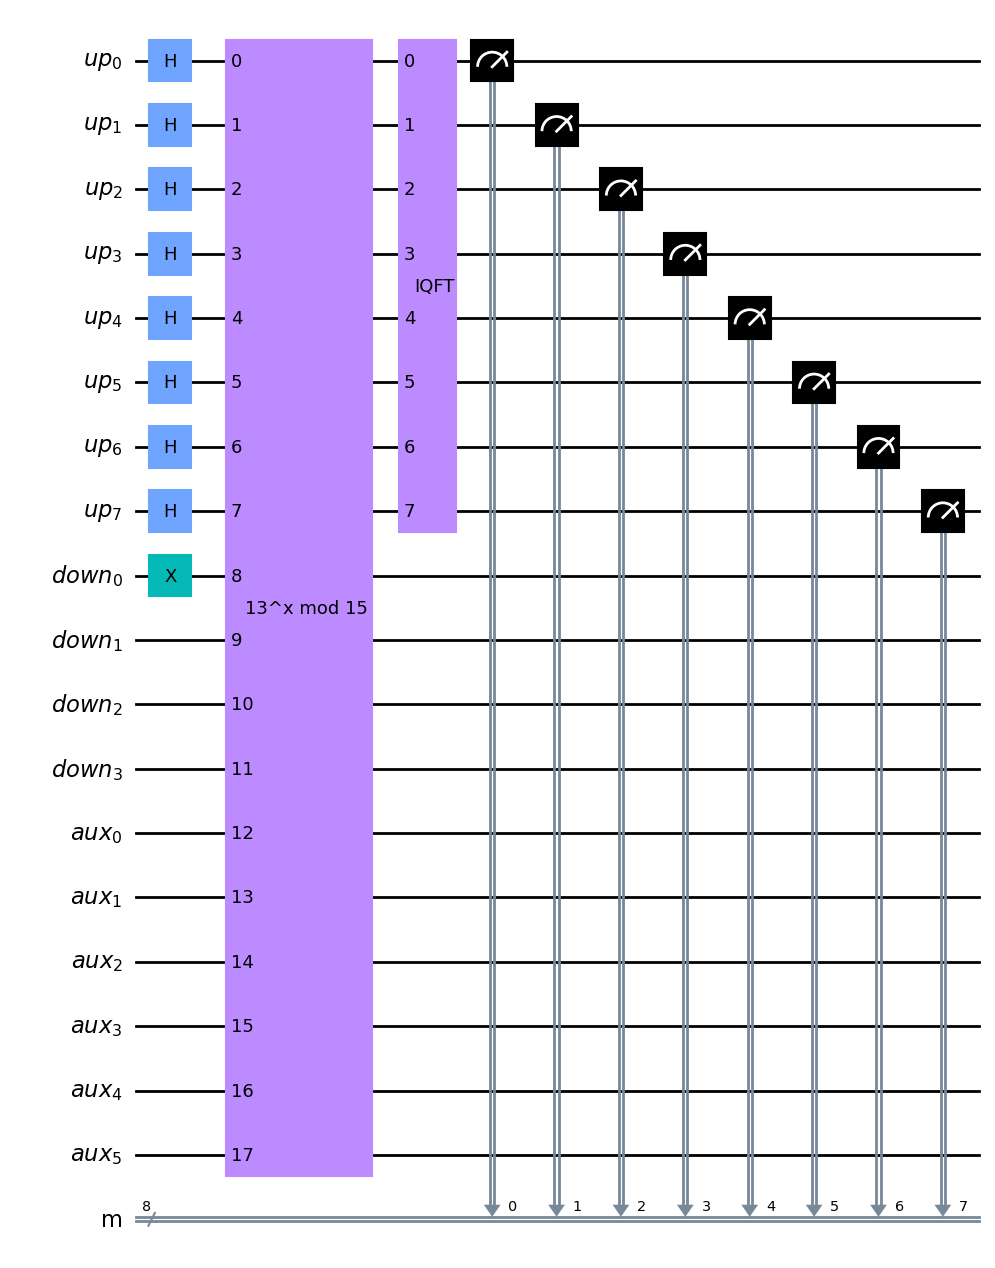

In [3]:
a = 13
circuit = shor.construct_circuit(N,a,measurement=True)
print("le circuit à une profondeur de ",circuit.decompose().decompose().decompose().decompose().depth()," opérateurs de bases")
circuit.draw('mpl')


In [4]:

Shor_compiled =  quantum_instance.transpile(circuit)
job = backend.run(Shor_compiled,shots=100)


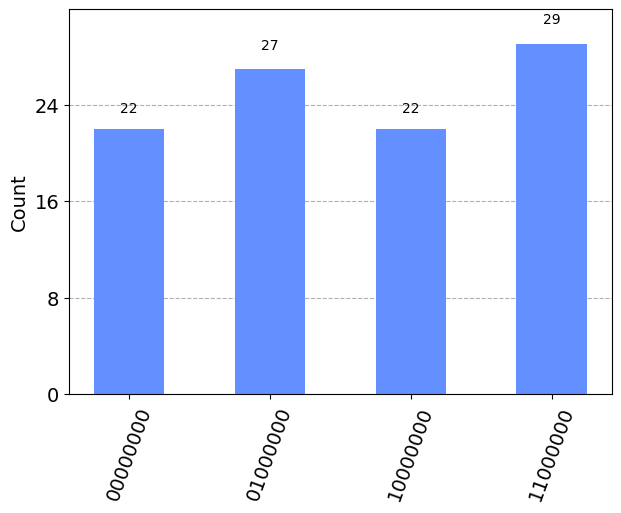

In [5]:

results = job.result()
counts = results.get_counts()
plot_histogram(counts)

Les variation de probabilité qu'on peut observé sont dû au faible nombre d'échantillons que nous avons pris. Les 4 états mesuré sont en fait équiprobable.
La quantité qui nous interesse est $r$ dans la formule

$\Large \frac{m}{2^n} = \frac{x}{r}$

ou $m$ est le résultat de la mesure, $x$ est un nombre aléatoire et $n$ est le nombre de qubits dans le registre servant à l'estimation de phase $8$, dans notre cas.
On trouve donc que dans notre cas, les quatre valeurs possible de $\tfrac{x}{r}$ sont $0$, $0.25$, $0.5$ et $0.75$. $r$ est le dénominateur commun à tous ces nombre.

Déterminez la valeur de r, et à partir de celle-ci déterminez un facteur de $15$


In [6]:
r = 4 #Quelle est la bonne valeur?

k = gcd(pow(a,r//2,N)-1,N)

print(k)

15


Exercice: 
  Imprimé le circuit de l'algorithm de Shor pour plusieurs valeur de N, et déterminé le nombre de qubit nécssaire à l'algorithme en fonction du nombre de bit utilisé par N.


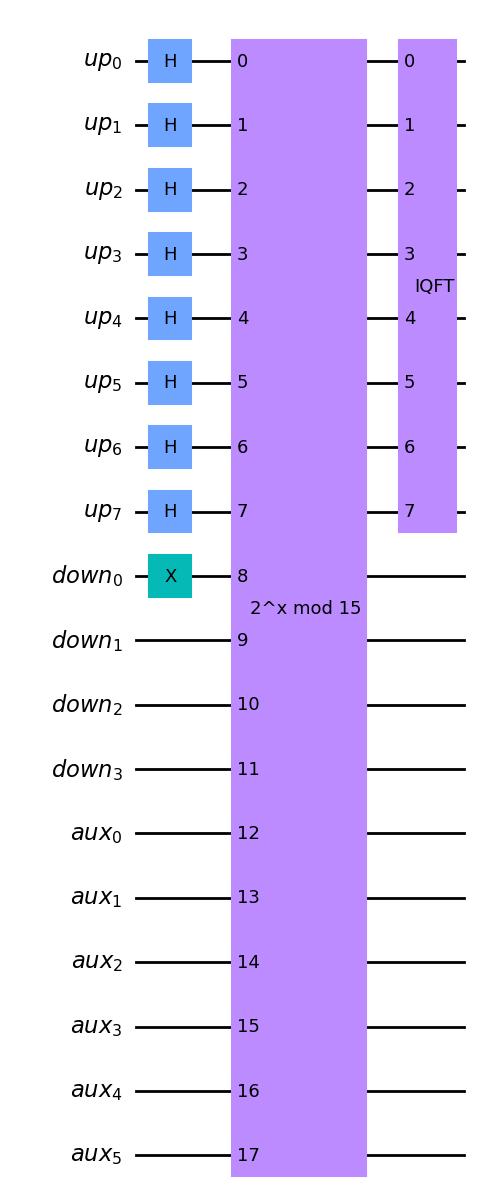

In [7]:
N = 15
nbit = N.bit_length()
circuit = shor.construct_circuit(N,2)
circuit.draw('mpl')